# **DATA COLLECTING**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2



## **EXPLORATORY DATA ANALYSIS**

# **`Memahami struktur data `**

1. Memeriksa dimensi dataset

In [ ]:
df.shape

(699, 11)

2. Menampilkan informasi tipe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
#Mengonversi kolom 'BareNuc' ke numerik dengan menangani error
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           699 non-null    int64  
 1   Clump        699 non-null    int64  
 2   UnifSize     699 non-null    int64  
 3   UnifShape    699 non-null    int64  
 4   MargAdh      699 non-null    int64  
 5   SingEpiSize  699 non-null    int64  
 6   BareNuc      683 non-null    float64
 7   BlandChrom   699 non-null    int64  
 8   NormNucl     699 non-null    int64  
 9   Mit          699 non-null    int64  
 10  Class        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
#mengecek distribusi kelas
df['Class'].value_counts()

,count
Class,
2,458
4,241


2 = benign, 4 = malignant

## **Menangani Missing Values**

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Missing Values:
ID              0
Clump           0
UnifSize        0
UnifShape       0
MargAdh         0
SingEpiSize     0
BareNuc        16
BlandChrom      0
NormNucl        0
Mit             0
Class           0
dtype: int64

Number of duplicate rows:
8


# **Memeriksa apakah ada nilai nan di dataset**

In [ ]:
df.isna().sum()

,0
ID,0
Clump,0
UnifSize,0
UnifShape,0
MargAdh,0
SingEpiSize,0
BareNuc,16
BlandChrom,0
NormNucl,0
Mit,0


# **Menganalisis Statistik Deskriptif**

In [ ]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# **Melihat distribusi data**

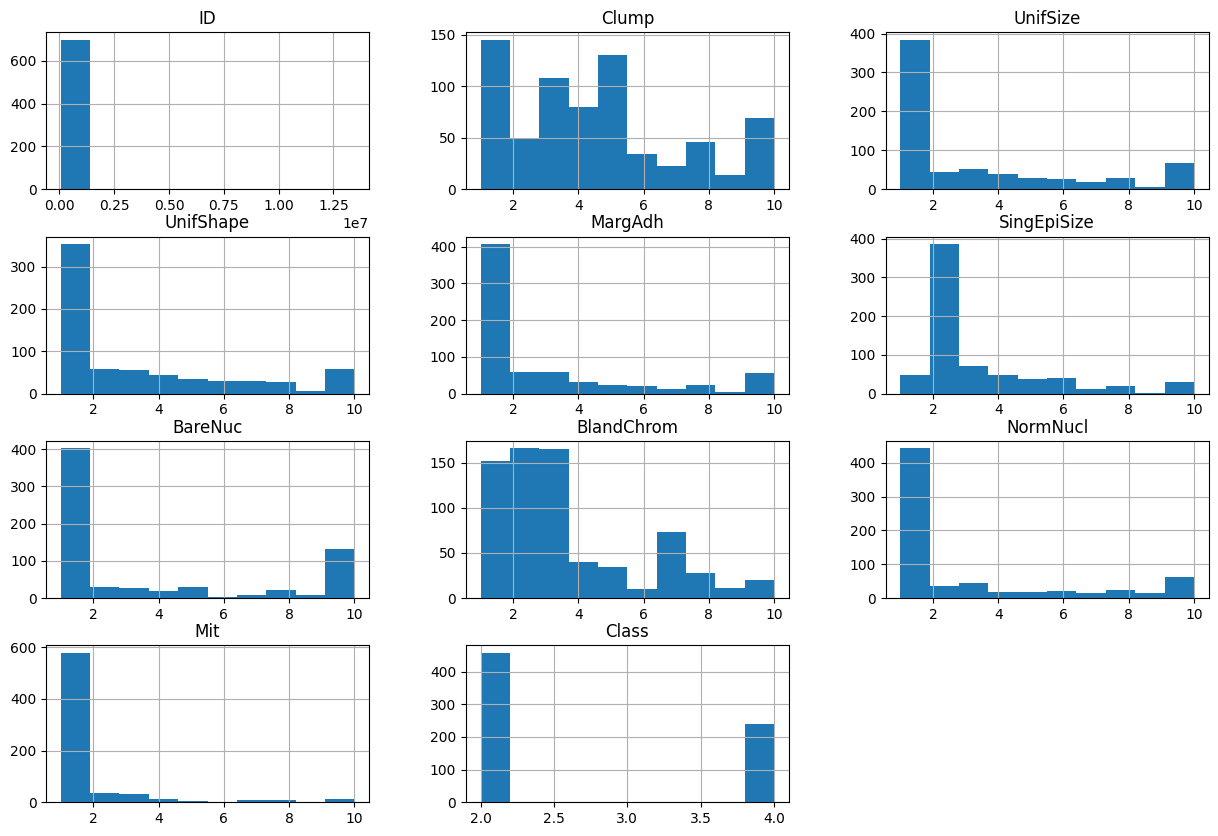

In [ ]:
import matplotlib.pyplot as plt
df.hist(column=['ID','Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'], figsize=(15,10))
plt.show()


# **Mengidentifikasi Outliers**

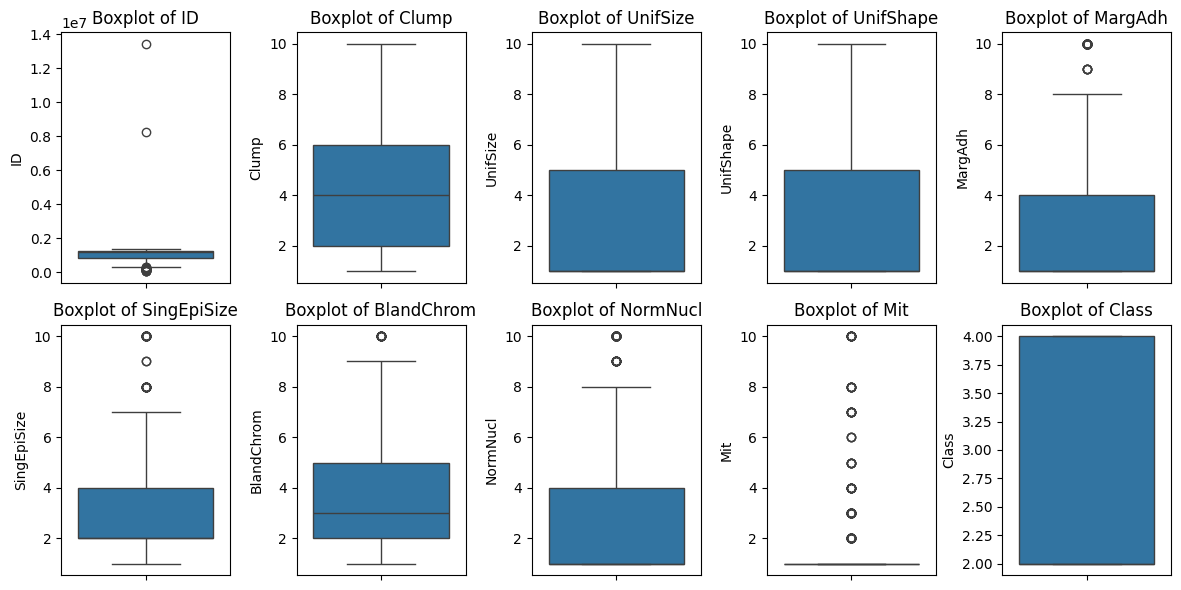

Data Outlier:


,0
ID,23
Clump,0
UnifSize,0
UnifShape,0
MargAdh,60
SingEpiSize,54
BlandChrom,20
NormNucl,77
Mit,120
Class,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Mengidentifikasi Outliers (using seaborn boxplots)
numeric_columns = ['ID','Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit','Class']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#Menghitung IQR dan outlier
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print('Data Outlier:')
outliers

# **Correlation Heatmap**

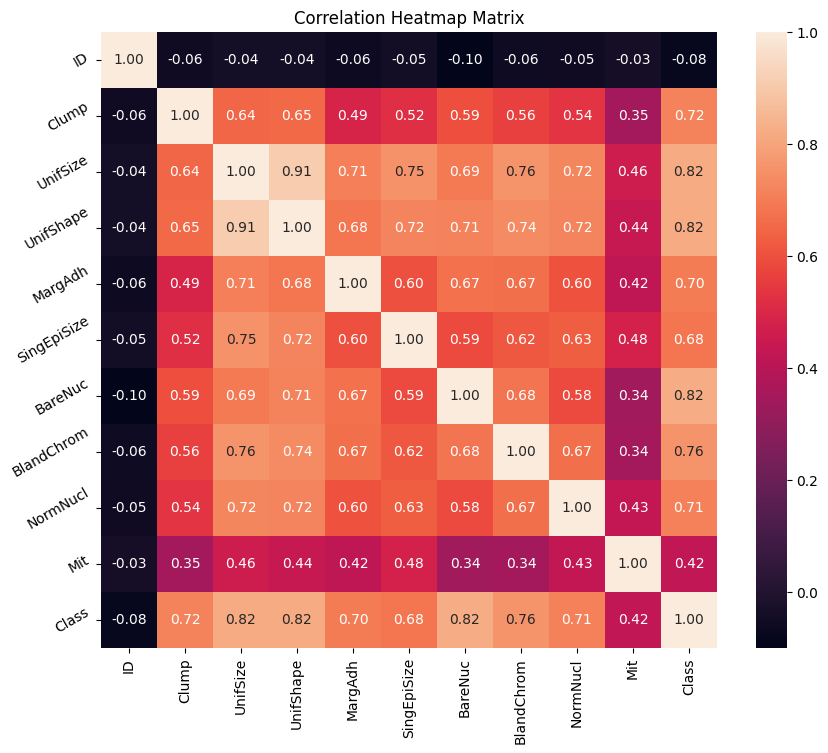

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap Matrix')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Berdasarkan heatmap korelasi di atas, dapat disimpulkan bahwa:

* **Class** memiliki korelasi positif yang tinggi dengan `UnifSize`, `UnifShape`, dan `BareNuc` (koefisien korelasi = 0,82).
* **Class** memiliki korelasi positif dengan `Clump` (koefisien korelasi = 0,72), `MargAdh` (koefisien korelasi = 0,70), `SingEpiSize` (koefisien korelasi = 0,68), dan `NormNucl` (koefisien korelasi = 0,71).
* **Class** memiliki korelasi positif yang lemah dengan `Mit` (koefisien korelasi = 0,42).
* Variabel `Mit` memiliki korelasi positif yang lemah dengan semua variabel lainnya (koefisien korelasi < 0,50).

# **DATA PREPROCESSING**

# **Menghapus kolom ID karena tidak diperlukan**

In [ ]:
#Menghapus kolom ID
df.drop('ID', axis=1, inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clump        699 non-null    int64  
 1   UnifSize     699 non-null    int64  
 2   UnifShape    699 non-null    int64  
 3   MargAdh      699 non-null    int64  
 4   SingEpiSize  699 non-null    int64  
 5   BareNuc      683 non-null    float64
 6   BlandChrom   699 non-null    int64  
 7   NormNucl     699 non-null    int64  
 8   Mit          699 non-null    int64  
 9   Class        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


# **Handling Missing Values**

In [ ]:
#Mengisi missing values di 'BareNuc' dengan median
df['BareNuc'].fillna(df['BareNuc'].median(), inplace=True)

#Mengecek apakah masih ada missing values setelah imputasi
print("\nMissing Values after imputation:")
print(df.isnull().sum())



Missing Values after imputation:
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64


# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Pilih kolom-kolom yang akan diskalakan (kecuali kolom 'Class')
cols_to_scale = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']

#Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform kolom-kolom yang dipilih
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Display the scaled DataFrame
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,2
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,2
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,2
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,2
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,2


# **Membagi Data untuk training dan testing**

In [ ]:
#Declare feature vector and target variable
X = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (559, 9)
y_train shape: (559,)
X_test shape: (140, 9)
y_test shape: (140,)


# **MODEL TRAINING**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Model training and evaluation for k=5, 6, and 7
for k in [5, 6, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy for k={k}: {accuracy}")

Model Accuracy for k=5: 0.9857142857142858
Model Accuracy for k=6: 0.9642857142857143
Model Accuracy for k=7: 0.9714285714285714


In [ ]:
#Periksa overfitting and underfitting
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9678
Test set score: 0.9714


Hasil dari training set dan test set score cukup sebanding jadi tidak ada masalah overfitting

# **MODEL EVALUATION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Model evaluation for k=5, 6, and 7
for k in [5, 6, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'\nConfusion matrix for k={k}\n\n', cm)
    print(f'True Positives(TP) for k={k} = ', cm[0,0])
    print(f'True Negatives(TN) for k={k} = ', cm[1,1])
    print(f'False Positives(FP) for k={k} = ', cm[0,1])
    print(f'False Negatives(FN) for k={k} = ', cm[1,0])


Confusion matrix for k=5

 [[94  1]
 [ 1 44]]
True Positives(TP) for k=5 =  94
True Negatives(TN) for k=5 =  44
False Positives(FP) for k=5 =  1
False Negatives(FN) for k=5 =  1

Confusion matrix for k=6

 [[94  1]
 [ 4 41]]
True Positives(TP) for k=6 =  94
True Negatives(TN) for k=6 =  41
False Positives(FP) for k=6 =  1
False Negatives(FN) for k=6 =  4

Confusion matrix for k=7

 [[94  1]
 [ 3 42]]
True Positives(TP) for k=7 =  94
True Negatives(TN) for k=7 =  42
False Positives(FP) for k=7 =  1
False Negatives(FN) for k=7 =  3


Model KKN dengan k = 5 memberikan hasil yang lebih akurat dan menghasilkan jumlah kesalahan yang lebih sedikit dibandingkan dengan model k = 6 dan k =7

**KNN Classification model using k=5**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model evaluation using k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[94  1]
 [ 1 44]]
Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.99      0.99        95
           4       0.98      0.98      0.98        45

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



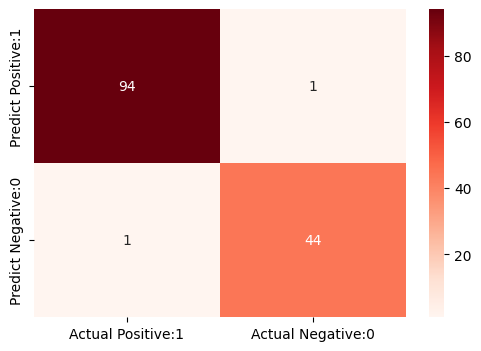

In [ ]:
#Plot confusion matrix
cm_5 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
cm_matrix = pd.DataFrame(data=cm_5, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()